# 1. Perkenalan

- Nama : Steven Kusuma
- Batch : 015
- Dataset : Telco Customer Churn (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- Objective : Membuat model Artifical Neural Network dengan menggunakan `Sequential API` dan `Functional API` untuk memprediksi `Churn Customer`.

# 2. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Functional API
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

# 3. Data Loading

In [2]:
# Data Loading

data = pd.read_csv('h8dsft_Milestone1P2_Steven_Kusuma.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data terdiri dari `21` column :

- `3` Integer
- `18` String

Ada 2 keanehan dalam data ini yaitu :

- Column `SeniorCitizen` seharusnya dalam bentuk string `Yes atau No` tetapi di data asli adalah integer.

- Column `TotalCharges` seharusnya dalam bentuk integer tetapi di data asli adalah object.

Nanti akan di convert pada bagian `Data Preprocessing`.

In [6]:
# Check Dataset - 2

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data `mean` dan `50%` hampir sama. Data terlihat normally distributed.

In [7]:
# Check Missing Values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada Missing Values.

# 4. Exploratory Data Analysis (EDA)

In [8]:
data_corr = data.copy()

In [9]:
# Convert Categorical data to Numbers to see correlation

data_corr['customerID'] = data_corr['customerID'].astype('category').cat.codes
data_corr['gender'] = data_corr['gender'].astype('category').cat.codes
data_corr['Partner'] = data_corr['Partner'].astype('category').cat.codes
data_corr['Dependents'] = data_corr['Dependents'].astype('category').cat.codes
data_corr['PhoneService'] = data_corr['PhoneService'].astype('category').cat.codes
data_corr['MultipleLines'] = data_corr['MultipleLines'].astype('category').cat.codes
data_corr['InternetService'] = data_corr['InternetService'].astype('category').cat.codes
data_corr['OnlineSecurity'] = data_corr['OnlineSecurity'].astype('category').cat.codes
data_corr['OnlineBackup'] = data_corr['OnlineBackup'].astype('category').cat.codes
data_corr['DeviceProtection'] = data_corr['DeviceProtection'].astype('category').cat.codes
data_corr['TechSupport'] = data_corr['TechSupport'].astype('category').cat.codes
data_corr['StreamingTV'] = data_corr['StreamingTV'].astype('category').cat.codes
data_corr['StreamingMovies'] = data_corr['StreamingMovies'].astype('category').cat.codes
data_corr['Contract'] = data_corr['Contract'].astype('category').cat.codes
data_corr['PaperlessBilling'] = data_corr['PaperlessBilling'].astype('category').cat.codes
data_corr['PaymentMethod'] = data_corr['PaymentMethod'].astype('category').cat.codes
data_corr['TotalCharges'] = data_corr['TotalCharges'].astype('category').cat.codes
data_corr['Churn'] = data_corr['Churn'].astype('category').cat.codes
data_corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


<AxesSubplot:>

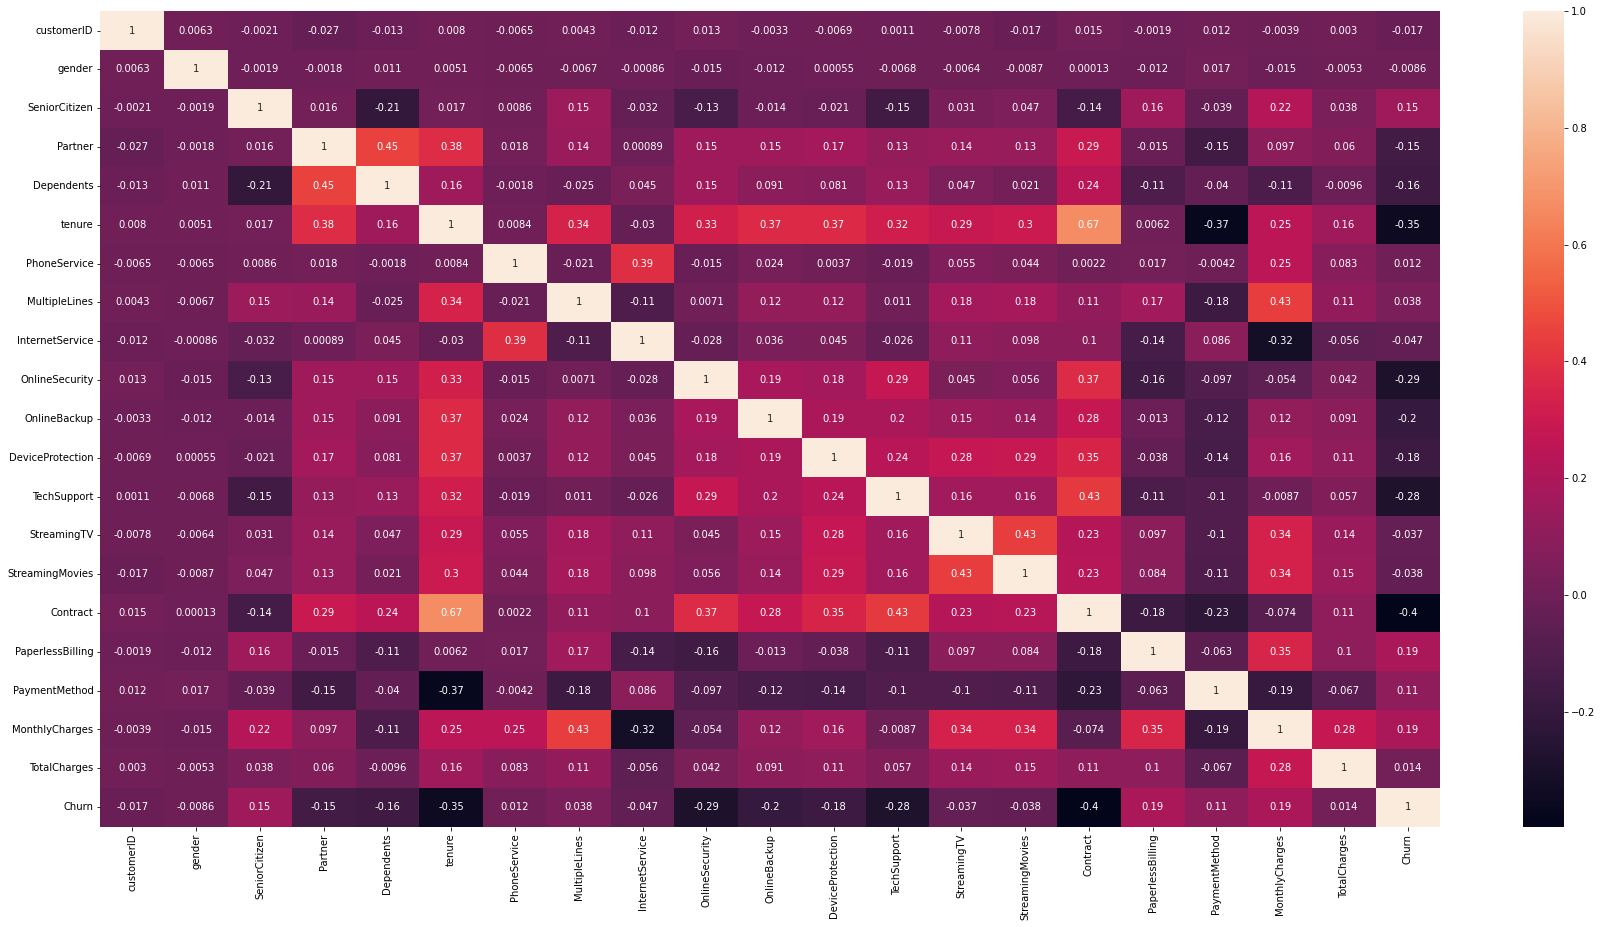

In [10]:
# Print Correlation Matrix

plt.figure(figsize=(30, 15))
sns.heatmap(data_corr.corr(), annot=True)

Bisa dilihat dari correlation matrix yang diantara -0.14 s/d 0 s/d 0.14 itu adalah features yang paling tidak berpengaruh terhadap target yaitu :

- customerID
- gender
- PhoneService
- MulitpleLines
- InternetService
- StreamingTV
- StreamingMovies
- PaymentMethod
- TotalCharges

Features ini tidak akan digunakan.

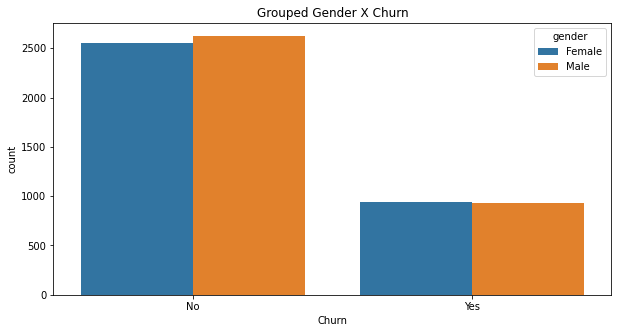

In [11]:
# Churn X Gender

plt.figure(figsize=(10, 5))
sns.countplot(x=data['Churn'],hue=data['gender'])
plt.title('Grouped Gender X Churn')
plt.show()


Dilihat bahwa `Gender` tidak mempengaruhi `Churn` rate.

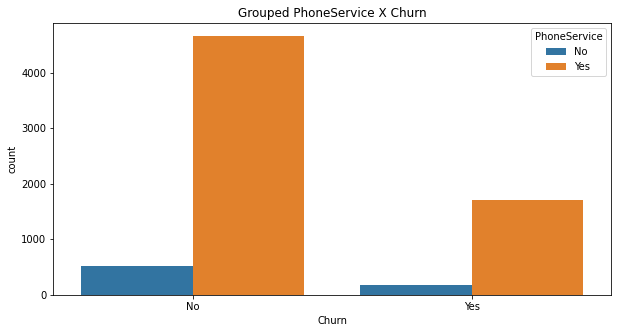

In [12]:
# Churn X PhoneService

plt.figure(figsize=(10, 5))
sns.countplot(x=data['Churn'],hue=data['PhoneService'])
plt.title('Grouped PhoneService X Churn')
plt.show()


Begitu pula dengan `PhoneService` juga tidak mempengaruhi `Churn` rate.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


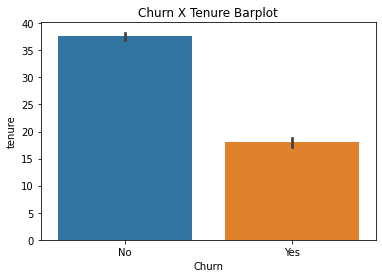

In [13]:
# Churn X Tenure Barplot

sns.barplot(data['Churn'], data['tenure'])
plt.title('Churn X Tenure Barplot')
plt.show()

Tenure di bawah `20 bulan` cenderung `Churn`.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


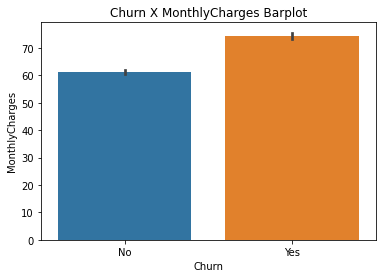

In [14]:
# Churn X MonthlyCharges Barplot

sns.barplot(data['Churn'], data['MonthlyCharges'])
plt.title('Churn X MonthlyCharges Barplot')
plt.show()

Begitu pula dengan `MonthlyCharges` harga lebih tinggi lebih membuat customer untuk `Churn`.

# 5. Data Preprocessing

## 5.1. Data Cleaning

In [15]:
# Mengubah data column `SeniorCitizen` yang tadinya 1 atau 0 menjadi Yes or No

data['SeniorCitizen'] = data['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [16]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Data column `SeniorCitizen` sudah berubah menjadi `Yes or No`.

In [17]:
# Mengubah Dtype `TotalCharges` dari string menjadi integer

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data column `TotalCharges` sudah menjadi integer.

In [19]:
# Mengubah data column `Churn` yang tadinya Yes atau No menjadi 1 or 0

data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [20]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Data column `Churn` sudah berubah menjadi `1 or 0`.

## 5.2. Get Data for Model Inference

In [21]:
# Get Data for model Inference

data_inf = data.sample(20, random_state=25)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4864,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
5033,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2671,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3919,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
3630,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
6110,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
792,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
5747,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
3593,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
2174,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [22]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [23]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


## 5.3. Splitting between `X` (Features) and `y` (Target)

In [24]:
# Splitting between `X` (Features) and `y` (Target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7019,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7020,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7021,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [25]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=25)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5073, 20)
Val Size :  (896, 20)
Test Size :  (1054, 20)


## 5.4. Handling Outliers

In [26]:
# Membuat histogram and boxplot.

def diagnostic_plots(data, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

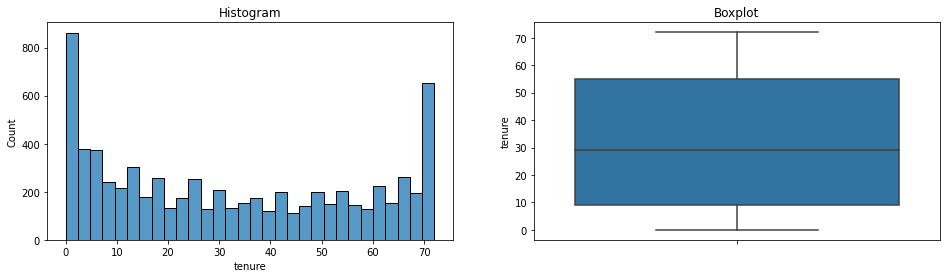

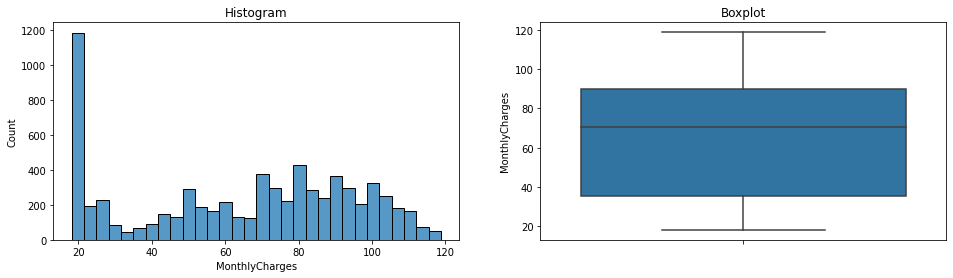

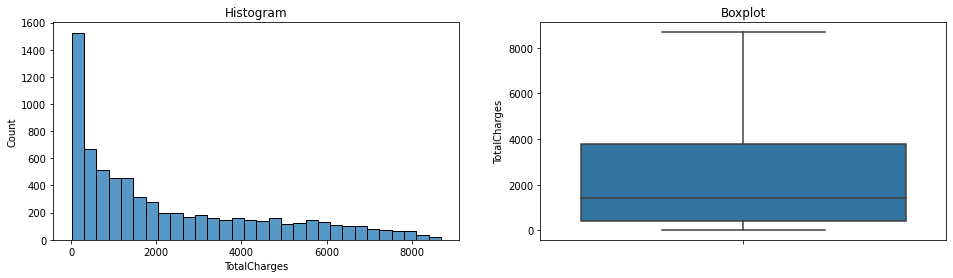

In [27]:
# Mencari Outliers di `tenure`, `MonthlyCharges`, `TotalCharges`

diagnostic_plots(data, 'tenure')
diagnostic_plots(data, 'MonthlyCharges')
diagnostic_plots(data, 'TotalCharges')

Tidak ada outliers yang perlu di handle.

## 5.5. Handling Missing Values

In [28]:
# Check Missing Values on X_train

X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [29]:
# Fill Missing Values `X_train TotalCharges` with `Tenure` x `MonthlyCharges`

X_train['TotalCharges'].fillna(value=X_train['tenure'] * X_train['MonthlyCharges'], inplace=True)

In [30]:
# Check lagi Missing Values on X_train

X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Sudah tidak ada missing values.

In [31]:
# Check Missing Values on X_val

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [32]:
# Fill Missing Values `X_val TotalCharges` with `Tenure` x `MonthlyCharges`

X_val['TotalCharges'].fillna(value=X_val['tenure'] * X_val['MonthlyCharges'], inplace=True)

In [33]:
# Check Missing Values on X_val

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Sudah tidak ada missing values.

In [34]:
# Check Missing Values on X_test

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [35]:
# Fill Missing Values `X_test TotalCharges` with `Tenure` x `MonthlyCharges`

X_test['TotalCharges'].fillna(value=X_test['tenure'] * X_test['MonthlyCharges'], inplace=True)

In [36]:
# Check lagi Missing Values on X_test

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Sudah tidak ada missing values.

In [37]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [38]:
# Check Missing Values on y_val

y_val.isnull().sum()

0

In [39]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

Sudah tidak ada lagi missing values di `X` dan `y`.

## 5.6. Feature Selection

In [40]:
# Display X_train

X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
965,3429-IFLEM,Female,No,No,No,71,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),77.35,5550.10
59,5954-BDFSG,Female,No,No,No,72,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70
4217,5108-ADXWO,Male,No,No,No,11,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.50,791.75
558,6815-ABQFQ,Male,No,Yes,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,107.25,6033.30
1105,9397-TZSHA,Female,No,No,No,69,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.60,1678.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,8849-AYPTR,Male,No,Yes,No,33,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,91.25,2964.05
4091,3345-PBBFH,Male,No,Yes,No,8,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,393.45
6235,6128-DAFVY,Female,No,No,No,56,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),44.85,2564.95
2716,4636-TVXVG,Male,No,Yes,Yes,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.95,1244.80


Features akan dipilih sesuai dengan yang sudah dilakukan pemilihan correlation antara `features` dan `target` di `Exploratory Data Analysis (EDA)`.

- customerID
- gender
- PhoneService
- MulitpleLines
- InternetService
- StreamingTV
- StreamingMovies
- PaymentMethod
- TotalCharges

Features ini akan di drop.

In [41]:
# Drop Columns

X_train.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'TotalCharges'], axis=1, inplace=True)
X_val.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'TotalCharges'], axis=1, inplace=True)
X_test.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'TotalCharges'], axis=1, inplace=True)
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
965,No,No,No,71,Yes,Yes,Yes,Yes,Two year,No,77.35
59,No,No,No,72,No,No,Yes,Yes,Two year,Yes,107.50
4217,No,No,No,11,Yes,No,No,No,Month-to-month,Yes,73.50
558,No,Yes,No,56,No,Yes,No,Yes,One year,Yes,107.25
1105,No,No,No,69,No internet service,No internet service,No internet service,No internet service,Two year,No,24.60
...,...,...,...,...,...,...,...,...,...,...,...
4742,No,Yes,No,33,No,No,No,No,Month-to-month,No,91.25
4091,No,Yes,No,8,No,Yes,No,No,Month-to-month,Yes,49.55
6235,No,No,No,56,No,No,No,No,Month-to-month,Yes,44.85
2716,No,Yes,Yes,62,No internet service,No internet service,No internet service,No internet service,One year,No,19.95


## 5.7. Get Numerical Columns and Categorical Columns

In [42]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


## 5.8. Scikit Pipeline

In [43]:
# Create A pipeline

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [44]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

X_train.shape

(5073, 25)

## 5.9. Tensorflow Pipeline

In [45]:
# Tensor Pipeline Train Set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=150).batch(64)

# Tensor Pipeline Test Set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

# Tensor Pipeline Validation Set
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

# `Sequential API`

# 6. Model Definition

In [46]:
# Create Sequential API
model_sequential = Sequential()

# Hidden Layer 1
model_sequential.add(Dense(23, activation='relu', input_shape=(25,)))

# Output Layer
model_sequential.add(Dense(1, activation='sigmoid'))

# Compiling
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                598       
                                                                 
 dense_1 (Dense)             (None, 1)                 24        
                                                                 
Total params: 622
Trainable params: 622
Non-trainable params: 0
_________________________________________________________________


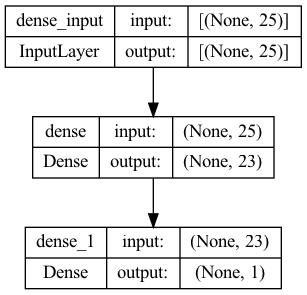

In [47]:
# Plot Layers

import tensorflow as tf

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

# 7. Model Training

In [48]:
# Train the Model

history_seq = model_sequential.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
80/80 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.6797 - val_loss: 0.4834 - val_accuracy: 0.7500
Epoch 2/30
 1/80 [..............................] - ETA: 0s - loss: 0.6117 - accuracy: 0.6250

2022-10-07 14:07:43.512554: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


80/80 [==============================] - 0s 713us/step - loss: 0.4673 - accuracy: 0.7623 - val_loss: 0.4454 - val_accuracy: 0.7935
Epoch 3/30
80/80 [==============================] - 0s 702us/step - loss: 0.4521 - accuracy: 0.7747 - val_loss: 0.4379 - val_accuracy: 0.7902
Epoch 4/30
80/80 [==============================] - 0s 719us/step - loss: 0.4467 - accuracy: 0.7786 - val_loss: 0.4345 - val_accuracy: 0.7924
Epoch 5/30
80/80 [==============================] - 0s 731us/step - loss: 0.4428 - accuracy: 0.7843 - val_loss: 0.4331 - val_accuracy: 0.7913
Epoch 6/30
80/80 [==============================] - 0s 697us/step - loss: 0.4395 - accuracy: 0.7867 - val_loss: 0.4319 - val_accuracy: 0.7902
Epoch 7/30
80/80 [==============================] - 0s 670us/step - loss: 0.4370 - accuracy: 0.7895 - val_loss: 0.4311 - val_accuracy: 0.7891
Epoch 8/30
80/80 [==============================] - 0s 671us/step - loss: 0.4345 - accuracy: 0.7928 - val_loss: 0.4303 - val_accuracy: 0.7891
Epoch 9/30
80/80 

# 8. Model Evaluation

In [49]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.582462,0.679677,0.483389,0.750000
1,0.467339,0.762271,0.445365,0.793527
2,0.452100,0.774690,0.437858,0.790179
3,0.446690,0.778632,0.434453,0.792411
4,0.442807,0.784348,0.433101,0.791295
5,0.439494,0.786714,0.431900,0.790179
6,0.436997,0.789474,0.431091,0.789062
7,0.434491,0.792825,0.430264,0.789062
8,0.432489,0.792825,0.428965,0.790179
9,0.430882,0.794796,0.428287,0.790179


<AxesSubplot:>

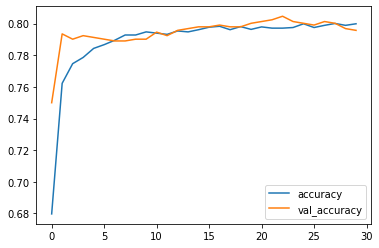

In [50]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

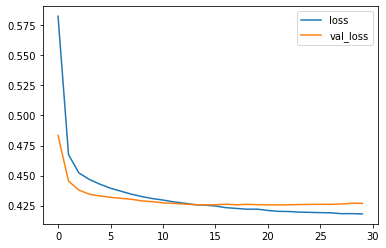

In [51]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

Learning rate model nya cukup bagus di 30 epoch. Tidak ada `Vanishing` ataupun `Exploding`.

In [52]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

33/33 [==============================] - 0s 328us/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       773
           1       0.64      0.56      0.60       281

    accuracy                           0.80      1054
   macro avg       0.74      0.72      0.73      1054
weighted avg       0.79      0.80      0.79      1054



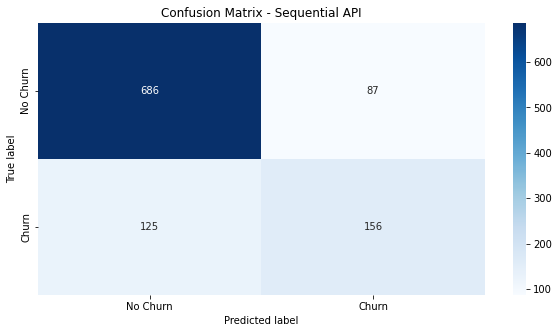

In [53]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Churn', 'Churn'], 
            yticklabels = ['No Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API")
plt.show()

### Model Analysis

Dengan menggunakan model `Sequential API`, kalau ground truth nya adalah `Churn` maka yang kita lihat ada `Recall` nomor `1` yaitu di `56%` hanya dapat diprediksi benar. Sisanya salah prediksi yang seharusnya `Churn` tapi terprediksi `Tidak Churn`.

# `Sequential API - Model Improvement`

# 6. Model Definition

In [54]:
# Create Sequential API - Model Improvement
model_sequential_improvement = Sequential()

# Hidden Layer 1
model_sequential_improvement.add(Dense(60, activation='relu', input_shape=(25,)))

# Hidden Layer 2
model_sequential_improvement.add(Dense(39, activation='relu'))

# Hidden Layer 3
model_sequential_improvement.add(Dense(19, activation='relu'))

# Output Layer
model_sequential_improvement.add(Dense(1, activation='sigmoid'))

# Compiling
tf.keras.optimizers.Nadam(learning_rate = 0.006)
model_sequential_improvement.compile(loss='binary_crossentropy',
                                     optimizer='Nadam',
                                     metrics=['accuracy'])

model_sequential_improvement.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 60)                1560      
                                                                 
 dense_3 (Dense)             (None, 39)                2379      
                                                                 
 dense_4 (Dense)             (None, 19)                760       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 4,719
Trainable params: 4,719
Non-trainable params: 0
_________________________________________________________________


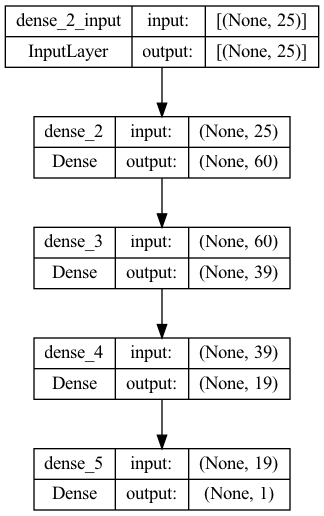

In [55]:
# Plot Layers

import tensorflow as tf

tf.keras.utils.plot_model(model_sequential_improvement, show_shapes=True)

# 7. Model Training

In [56]:
# Train the Model

history_seq_improvement = model_sequential_improvement.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
80/80 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7443 - val_loss: 0.4497 - val_accuracy: 0.7891
Epoch 2/30
80/80 [==============================] - 0s 807us/step - loss: 0.4442 - accuracy: 0.7761 - val_loss: 0.4439 - val_accuracy: 0.7868
Epoch 3/30
80/80 [==============================] - 0s 784us/step - loss: 0.4356 - accuracy: 0.7879 - val_loss: 0.4361 - val_accuracy: 0.7891
Epoch 4/30
80/80 [==============================] - 0s 778us/step - loss: 0.4300 - accuracy: 0.7905 - val_loss: 0.4322 - val_accuracy: 0.7946
Epoch 5/30
80/80 [==============================] - 0s 805us/step - loss: 0.4264 - accuracy: 0.7918 - val_loss: 0.4339 - val_accuracy: 0.7946
Epoch 6/30
80/80 [==============================] - 0s 788us/step - loss: 0.4236 - accuracy: 0.7960 - val_loss: 0.4387 - val_accuracy: 0.7891
Epoch 7/30
80/80 [==============================] - 0s 747us/step - loss: 0.4221 - accuracy: 0.7997 - val_loss: 0.4344 - val_accuracy: 0.7913
Epoch 8/

# 8. Model Evaluation

In [57]:
# Create Dataframe

history_seq_df_improvement = pd.DataFrame(history_seq_improvement.history)
history_seq_df_improvement

,loss,accuracy,val_loss,val_accuracy
0,0.505558,0.744333,0.449742,0.789062
1,0.444186,0.776069,0.443930,0.786830
2,0.435555,0.787897,0.436150,0.789062
3,0.430044,0.790459,0.432218,0.794643
4,0.426424,0.791839,0.433930,0.794643
5,0.423646,0.795979,0.438693,0.789062
6,0.422073,0.799724,0.434361,0.791295
7,0.420289,0.799527,0.432069,0.799107
8,0.418291,0.795584,0.442262,0.786830
9,0.417501,0.802878,0.438999,0.783482


<AxesSubplot:>

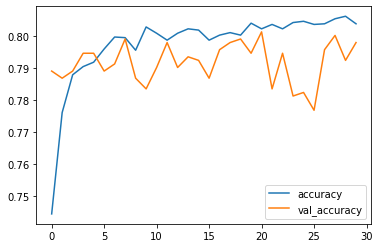

In [58]:
# Plot between Accuracy and val_accuracy

history_seq_df_improvement[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

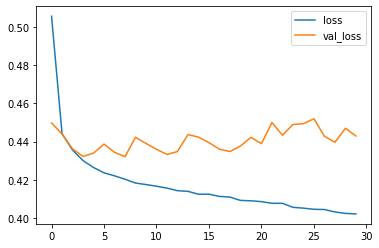

In [59]:
# Plot between loss and val_loss

history_seq_df_improvement[['loss', 'val_loss']].plot()

Di model improvement untuk `Sequential API` terjadi exploding. Model improvement ini kurang bagus untuk digunakan.

In [60]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report

y_pred_seq = model_sequential_improvement.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

33/33 [==============================] - 0s 379us/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       773
           1       0.61      0.59      0.60       281

    accuracy                           0.79      1054
   macro avg       0.73      0.73      0.73      1054
weighted avg       0.79      0.79      0.79      1054



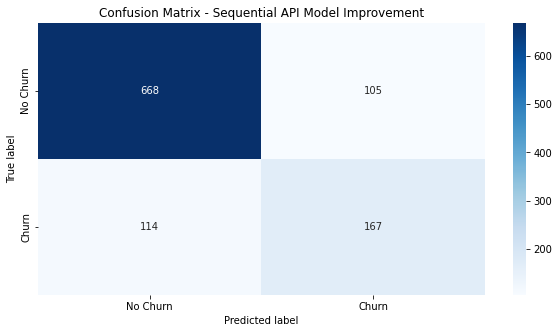

In [69]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Churn', 'Churn'], 
            yticklabels = ['No Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Sequential API Model Improvement")
plt.show()

### Model Analysis

Di model improvement ini cukup bagus dalam recallnya, menurun `False Negative` dari `125` menjadi `114`. Namun pada `False Positive` nya naik dari `87` menjadi `105`. Sangat signifikan dibandingkan penurunannya. Dimana Seharusnya customer `Tidak Churn` tapi terprediksi `Churn`, dan customer ini akan sangat sayang jika tidak diterima sebagai customer.

# `Functional API`

# 6. Model Definition

In [62]:
# Create Functional Model
input_layer = Input(shape=(25,))

# Hidden Layer 1
hidden_layer = Dense(18, activation='relu')(input_layer)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

# Model
model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compiling
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_6 (Dense)             (None, 18)                468       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________


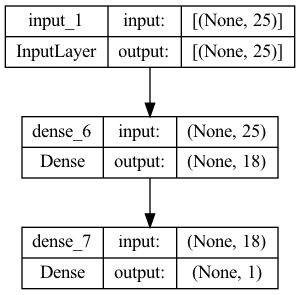

In [63]:
# Plot Models

tf.keras.utils.plot_model(model_functional, show_shapes=True)

# 7. Model Training

In [64]:
# Train the Model

history_func = model_functional.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
80/80 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.5468 - val_loss: 0.5419 - val_accuracy: 0.7310
Epoch 2/30
80/80 [==============================] - 0s 703us/step - loss: 0.5040 - accuracy: 0.7359 - val_loss: 0.4688 - val_accuracy: 0.7355
Epoch 3/30
80/80 [==============================] - 0s 680us/step - loss: 0.4676 - accuracy: 0.7544 - val_loss: 0.4514 - val_accuracy: 0.7679
Epoch 4/30
80/80 [==============================] - 0s 669us/step - loss: 0.4567 - accuracy: 0.7666 - val_loss: 0.4456 - val_accuracy: 0.7757
Epoch 5/30
80/80 [==============================] - 0s 691us/step - loss: 0.4513 - accuracy: 0.7727 - val_loss: 0.4425 - val_accuracy: 0.7857
Epoch 6/30
80/80 [==============================] - 0s 712us/step - loss: 0.4480 - accuracy: 0.7792 - val_loss: 0.4410 - val_accuracy: 0.7801
Epoch 7/30
80/80 [==============================] - 0s 678us/step - loss: 0.4453 - accuracy: 0.7812 - val_loss: 0.4396 - val_accuracy: 0.7779
Epoch 8/

# 8. Model Evaluation

In [65]:
# Create Dataframe

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.715801,0.546816,0.541889,0.731027
1,0.504050,0.735856,0.468837,0.735491
2,0.467565,0.754386,0.451432,0.767857
3,0.456652,0.766608,0.445626,0.775670
4,0.451267,0.772718,0.442509,0.785714
5,0.448010,0.779223,0.440973,0.780134
6,0.445320,0.781195,0.439626,0.777902
7,0.443354,0.782574,0.438637,0.779018
8,0.441459,0.781589,0.437481,0.780134
9,0.439664,0.783166,0.436345,0.785714


<AxesSubplot:>

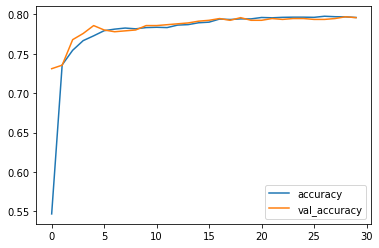

In [66]:
# Plot between Accuracy and val_accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

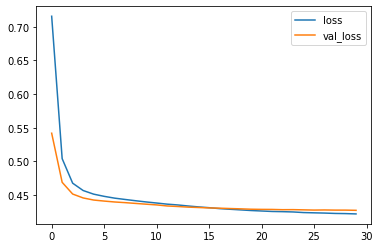

In [67]:
# Plot between Loss and val_loss

history_func_df[['loss', 'val_loss']].plot()

Dibandingkan dengan `Sequential API Baseline` dan juga `Sequential API Model Improvement`, `Functional API` punya hasil yang lebih bagus.

In [68]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

33/33 [==============================] - 0s 356us/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       773
           1       0.66      0.55      0.60       281

    accuracy                           0.81      1054
   macro avg       0.75      0.72      0.74      1054
weighted avg       0.80      0.81      0.80      1054



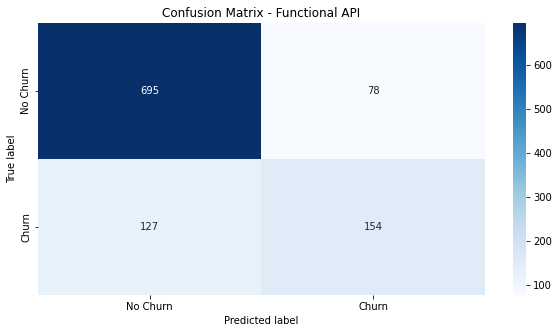

In [70]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_func)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Churn', 'Churn'], 
            yticklabels = ['No Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Functional API")
plt.show()

Dibandingkan dengan `Sequential API Baseline` dan juga `Sequential API Model Improvement`, `Functional API` punya hasil yang lebih bagus. Precision untuk `Churn` nya cukup baik, menurun dari `87` menjadi `78`.

# `Functional API - Model Improvement`

# 6. Model Definition

In [71]:
# Create Functional Model - Model Improvement
input_layer = Input(shape=(25,))

# Hidden Layer 1
hidden_layer = Dense(50, activation='relu')(input_layer)

# Hidden Layer 2
hidden_layer1 = Dense(34, activation='relu')(hidden_layer)

# Hidden Layer 3
hidden_layer2 = Dense(18, activation='relu')(hidden_layer1)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Model
model_functional_improvement = Model(inputs=input_layer, outputs=output_layer)

# Compiling
tf.keras.optimizers.Nadam(learning_rate = 0.006)
model_functional_improvement.compile(loss='binary_crossentropy', 
                                     optimizer='Nadam',
                                     metrics=['accuracy'])

model_functional_improvement.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_8 (Dense)             (None, 50)                1300      
                                                                 
 dense_9 (Dense)             (None, 34)                1734      
                                                                 
 dense_10 (Dense)            (None, 18)                630       
                                                                 
 dense_11 (Dense)            (None, 1)                 19        
                                                                 
Total params: 3,683
Trainable params: 3,683
Non-trainable params: 0
_________________________________________________________________


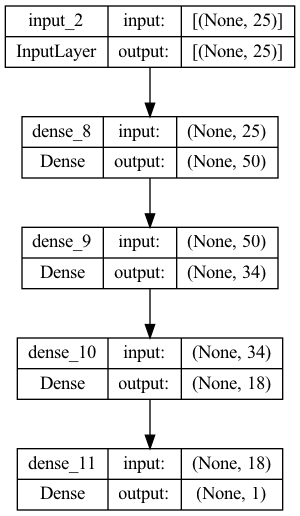

In [72]:
# Plot Models

tf.keras.utils.plot_model(model_functional_improvement, show_shapes=True)

# 7. Model Training

In [73]:
# Train the Model

history_func_improvement = model_functional_improvement.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
80/80 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7495 - val_loss: 0.4389 - val_accuracy: 0.7980
Epoch 2/30
80/80 [==============================] - 0s 782us/step - loss: 0.4412 - accuracy: 0.7836 - val_loss: 0.4374 - val_accuracy: 0.7891
Epoch 3/30
80/80 [==============================] - 0s 781us/step - loss: 0.4343 - accuracy: 0.7911 - val_loss: 0.4357 - val_accuracy: 0.7891
Epoch 4/30
80/80 [==============================] - 0s 752us/step - loss: 0.4304 - accuracy: 0.7928 - val_loss: 0.4360 - val_accuracy: 0.7857
Epoch 5/30
80/80 [==============================] - 0s 771us/step - loss: 0.4273 - accuracy: 0.7960 - val_loss: 0.4307 - val_accuracy: 0.7879
Epoch 6/30
80/80 [==============================] - 0s 732us/step - loss: 0.4239 - accuracy: 0.7976 - val_loss: 0.4320 - val_accuracy: 0.7924
Epoch 7/30
80/80 [==============================] - 0s 791us/step - loss: 0.4222 - accuracy: 0.7983 - val_loss: 0.4384 - val_accuracy: 0.7846
Epoch 8/

# 8. Model Evaluation

In [74]:
# Create Dataframe

history_func_df_improvement = pd.DataFrame(history_func_improvement.history)
history_func_df_improvement

,loss,accuracy,val_loss,val_accuracy
0,0.507273,0.749458,0.438925,0.797991
1,0.441153,0.783560,0.437353,0.789062
2,0.434265,0.791051,0.435666,0.789062
3,0.430351,0.792825,0.436027,0.785714
4,0.427283,0.795979,0.430718,0.787946
5,0.423904,0.797556,0.432022,0.792411
6,0.422162,0.798344,0.438448,0.784598
7,0.421532,0.796176,0.439625,0.784598
8,0.419717,0.800118,0.432284,0.793527
9,0.418023,0.795979,0.432986,0.794643


<AxesSubplot:>

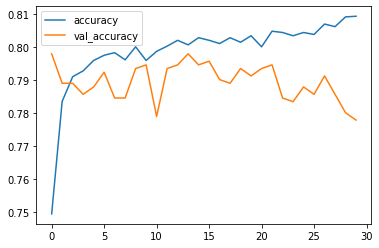

In [75]:
# Plot between Accuracy and val_accuracy

history_func_df_improvement[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

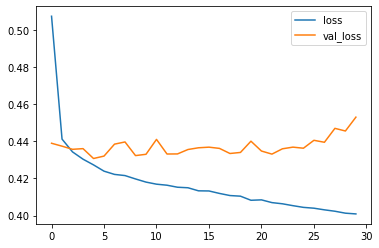

In [76]:
# Plot between Loss and val_loss

history_func_df_improvement[['loss', 'val_loss']].plot()

Di model improvement untuk `Functional API` terjadi exploding. Model improvement ini kurang bagus untuk digunakan.

In [77]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report

y_pred_func = model_functional_improvement.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

33/33 [==============================] - 0s 375us/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       773
           1       0.58      0.62      0.60       281

    accuracy                           0.78      1054
   macro avg       0.72      0.73      0.72      1054
weighted avg       0.78      0.78      0.78      1054



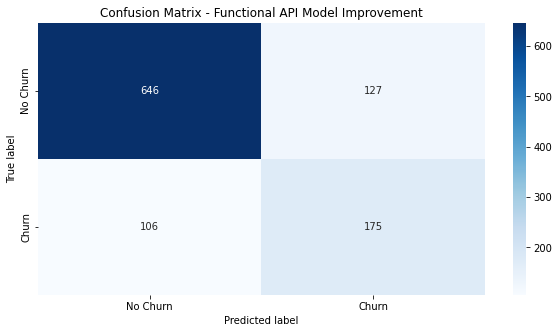

In [78]:
# Check Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_func)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['No Churn', 'Churn'], 
            yticklabels = ['No Churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Functional API Model Improvement")
plt.show()

Secara keseluruhan `Functional API Model Improvement` juga mengalami penurunan meskipun sudah dilakukan tuning.

# 9. Model Saving

## 9.1. Frontend

In [79]:
# Save the Preprocess Files

import pickle

pickle.dump(final_pipeline, open('preprocess_churn.pkl', 'wb'))

## 9.2. Backend

In [80]:
# Freeze Best Model

model_functional.trainable = False

In [81]:
# Best Model Summary

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_6 (Dense)             (None, 18)                468       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 487
Trainable params: 0
Non-trainable params: 487
_________________________________________________________________


In [82]:
model_functional.save("churn_model")

INFO:tensorflow:Assets written to: churn_model/assets


In [83]:
! zip -r churn_model.zip churn_model

updating: churn_model/ (stored 0%)
updating: churn_model/keras_metadata.pb (deflated 84%)
updating: churn_model/variables/ (stored 0%)
updating: churn_model/variables/variables.data-00000-of-00001 (deflated 38%)
updating: churn_model/variables/variables.index (deflated 60%)
updating: churn_model/saved_model.pb (deflated 87%)
updating: churn_model/assets/ (stored 0%)


# 10. Model Inference

## 10.1. Load Model

In [84]:
# Load Pipeline

pipe = pickle.load(open("preprocess_churn.pkl", "rb"))

## 10.2. Inferencing

In [85]:
# Display Inference-Set 

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [86]:
data_inf_2 = data_inf.drop(['Churn'], axis=1)

In [87]:
data_inf_2.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'TotalCharges'], axis=1, inplace=True)

In [88]:
data_inf_final = pipe.transform(data_inf_2)

In [89]:
# Predict using Model Functional & Change if >= 0.5 to 1

y_pred_inf_func = model_functional.predict(data_inf_final)
y_pred_inf_func = np.where(y_pred_inf_func >= 0.5, 1, 0)
y_pred_inf_func

1/1 [==============================] - 0s 12ms/step


array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [90]:
# Create DataFrame of Churn's Prediction Model Functional

y_pred_inf_data_func = pd.DataFrame(y_pred_inf_func, columns=['Churn_Prediction_Func'])
y_pred_inf_data_func

,Churn_Prediction_Func
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [92]:
# Concate between Inference-Set and Churn's Prediction Model Functional

data_inf = pd.concat([data_inf, y_pred_inf_data_func], axis=1)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Prediction_Func
0,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0,0
1,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0,0
2,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0,0
3,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1,1
4,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1,0
5,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0,0
6,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0,0
7,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0,0
8,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1,1
9,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0,0


In [93]:
data_inf.iloc[:,-2:]

,Churn,Churn_Prediction_Func
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


Dari `20` data ada `2` data yang salah prediksi untuk `Best Model`, bisa disimpulkan bahwa tingkat accuracy prediksi adalah sekitar >= `80%`. Atau bisa di lihat di `Functional Model` classification reportnya bagian accuracy.

# 11. Kesimpulan

Kedua `Neural Network Model` bekerja dan menghasilkan hasil yang sangat mirip, meskipun sudah dilakukan tuning tetap juga tidak membagus hanya memperburuk `Baseline Model`.

In general, `Functional API Baseline Model` menghasilkan hasil lebih bagus dari semuanya.